# Space Flight Mice Kidney Gene Analysis
## network_bio_toolkit all 3 pipelines
### Python 2 compatible version

----------------------

Author: Mikayla Webster (13webstermj@gmail.com)

Date: 21st June, 2018

----------------------

<a id='toc'></a>
## Table of Contents
1. [Background](#background)
2. [Import packages](#import)
3. [Upstream Regulator Analysis](#ura)
    1. [Load Networks](#loadura)
    2. [Localization](#local)
    3. [TF Enrichment](#enrich)
    4. [TF Activation State Prediction](#active)
    5. [Display Our results](#display)
4. [Heat Propagation and Clustering Analysis](#hpc)
    1. [Load Networks](#loadhpc)
    2. [Run Heat Propagation](#heat)
    3. [Clustering](#cluster)
5. [Gene Set Enrichment Analysis](#gsea)
    1. [User Preferences for Metafile Filtering](#meta)
    2. [Filter Expression File](#expression)
    3. [GSEA call](#gseacall)
    4. [Visualization Functions](#vis)

## Background
<a id='background'></a>

Network biology is quickly becoming an indispensable tool for elucidating dysregulated biological pathways and furthering understanding in disease. However, network analysis is intimidating to many researchers.  We present an integrated network analysis toolkit, network_bio_toolkit, built upon our previous interactive network visualization tool, visJS2jupyter, to provide three common network analysis workflows for RNAseq data, from start to finish, requiring only an expression file, or a list of differentially expressed genes (DEGs).  The tool is designed for use in Jupyter notebooks, to promote reproducible research.

This package includes a set of start-to-finish functions for three common network analysis pipelines: upstream regulator analysis, network propagation and clustering, and gene set enrichment analysis. The upstream regulator analysis pipeline includes localization, transcription factor (TF) enrichment, and TF activation state prediction methods. The network propagation and clustering pipeline includes network propagation, clustering, and annotation functionality. The gene set enrichment analysis includes easy-to-use data filtering methods, that help the user prep their data as input for GSEA’s enrichment calculation function. Each pipeline includes functions to easily load and process a variety of genome networks, such as STRING and GIANT, from NDEXbio, eliminating the need for downloading large and unwieldy network files. Each pipeline also has data visualization functions, so interpreting results from our pipelines is intuitive. Many of the analysis components of each pipeline are modular; the user can pick and choose which functions are relevant to their data and leave out unnecessary steps. 

In this notebook, we demonstrate the functionality of network_bio_toolkit by analyzing a set of differentially expressed genes derived from NASA's [Rodent Research Project on the ISS](https://genelab-data.ndc.nasa.gov/genelab/accession/GLDS-102). The tissues sampled for this experiment were taken from the kidneys of mice who experienced space flight. The data and files used in this analysis are the results after RNAseq alignment and quantification using STAR+RSEM, and differential expression analysis using Limma-voom, on the NASA kidney data.

## Import packages
<a id='import'></a>

In [1]:
# import upstream regulator module
import sys
code_path = '../../network_bio_toolkit'
sys.path.append(code_path)

import Upstream
reload(Upstream)

import Heat2
reload(Heat2)

import PrepGsea
reload(PrepGsea)

<module 'PrepGsea' from '../../network_bio_toolkit\PrepGsea.pyc'>

## Upstream Regulator Analysis
<a id='ura'></a>

The inspiration for these modules comes from Ingenuity System's [Ingenuity Upstream Regulator Analysis in IPA®](http://pages.ingenuity.com/rs/ingenuity/images/0812%20upstream_regulator_analysis_whitepaper.pdf).

In [2]:
# User preferences
symbol = 'symbol'
entrez = 'entrez'

human = 'human'
mouse = 'mouse'

ura = Upstream.Upstream(gene_type = symbol, species = mouse)

### Load Networks
<a id='loadura'></a>

1. List of all **Transcription Factors** (TF's): [slowkow](https://github.com/slowkow/tftargets) and [jaspar](http://jaspar.genereg.net/)
2. **Background Network**: [STRING human protein interactions network](https://string-db.org/cgi/download.pl?)
3. User-supplied list of **Differentially Expressed Genes** (DEG's)

Note: We need to use the String protein ACTIONS file because it has activating and inhibiting interaction information.

In [3]:
# transcription factors
ura.easy_load_TF_list('../../TF_databases/TF_database_URA.csv')
TF_list = ura.get('TF_list')
print "Number of TF's: " + str(len(TF_list))

Number of TF's: 3983


../../network_bio_toolkit\create_graph.py:46: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  df2 = pd.DataFrame.from_csv(csv_filename)


In [5]:
# background network
filename = "../../background_networks/10090.protein.actions.v10.5.txt"
confidence_filter = 400
ura.load_STRING_to_digraph(filename, confidence_filter)
DG_TF = ura.get('DG_TF')

print "\nNumber of interactions: " + str(len(list(DG_TF.edges())))

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-7303...done.
Finished.
36 input query terms found dup hits:
	[(u'ENSMUSP00000010241', 2), (u'ENSMUSP00000010248', 2), (u'ENSMUSP00000095200', 2), (u'ENSMUSP00000
155 input query terms found no hit:
	[u'ENSMUSP00000036849', u'ENSMUSP00000097354', u'ENSMUSP00000097358', u'ENSMUSP00000137522', u'ENSMU
Pass "returnall=True" to return complete lists of duplicate or missing query terms.

Number of interactions: 24678


In [33]:
# differentially expressed genes
DEG_filename = "../../DEG_databases/DE_SFvsGC_12_Kidney.csv" 
ura.create_DEG_list(DEG_filename, p_value_filter = 0.05, sep = ',')

DEG_list = ura.get('DEG_list')
print "Number of DEG's: " + str(len(DEG_list))

Number of DEG's: 70


### Localization
<a id='local'></a>

Below we see that the set of DEGs is visibly more localized when compared to randomly selected gene sets with similar degree distributions. In the first 2 figures, the blue distributions are formed from randomly sampling 80% of the genes from the set of DEGs. In the third figure, the red line is the absolute size of the largest connected component of the DEGs. The blue distributions and red line are visibly distinct from the randomly sampled sets.

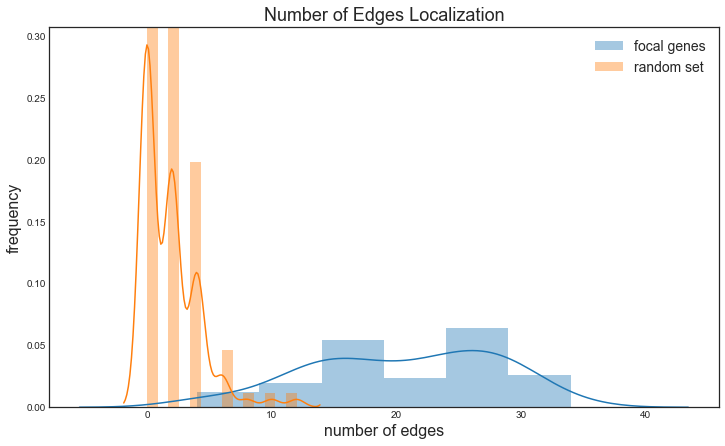

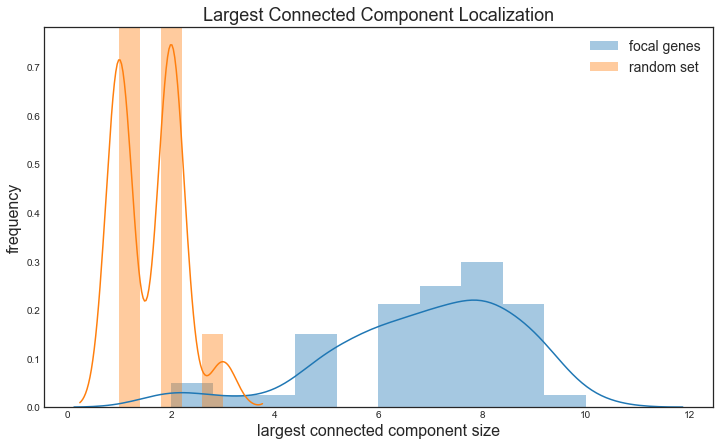

In [57]:
numedges_list, numedges_rand, LCC_list, LCC_rand = ura.localization(num_reps = 100, 
                                                                     sample_frac = 0.8, 
                                                                     method = 'both', 
                                                                     plot = True)

The p-value of zero indicates extreme significance.

0.0


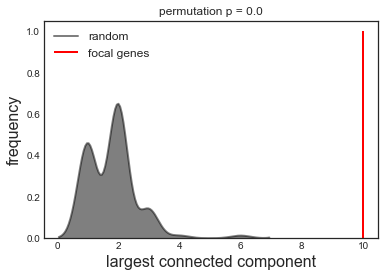

In [58]:
# test out plotting parameters with a smaller num_reps first.
numedges_list, numedges_rand, LCC_list, LCC_rand = ura.localization_full(num_reps = 100, 
                                                                          method = 'LCC', 
                                                                          label = 'focal genes',
                                                                          line_height = 1,
                                                                          legend_loc = 'upper left')

## TF Enrichment
<a id='enrich'></a>
How relevant is a TF to its DEG targets? Are they connected by chance, or is their connection statistically significant? Are the TFs themselves enriched? We calculate the -log(p-value) using [scipy.stats.hypergeom.logsf](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.hypergeom.html) for every TF-plus-downstream-targets network, and then for the group of TFs themselves.
- high value = significant connection between this TF and its DEG targets
- low value = TF is randomly associated with its DEG targets
- zero = None of this TF's targets were DEG's
- inf = original p-value was so small that its log is inf. Very high significance.

Below, we see that the TF Zbtb4 and its downstream targets are significnantly enriched, however the set of TFs themselves are not.

In [36]:
# Enrichment of every TF with respect to its targets
ura.tf_target_enrichment_calc()
ura.get('tf_target_enrichment').head()

Zbtb4          inf
Sp4            inf
Arntl    28.448383
Npas2    21.687397
Rora     18.862970
Name: tf-target enrichment, dtype: float64

In [37]:
# Enrichment of TF's themselves
ura.tf_enrichment_calc()   
ura.get('tf_enrichment')

TF_ENRICHMENT    0.059017
dtype: float64

## TF Activation State Prediction
<a id='active'></a>

Is a given TF activating or inhibiting to its downstream targets? We quantify the activation state of the TF using a z-score calculation. A positive z-score indicates activating while a negative score indicates inhibiting. The significance of the z-score is a vote for how confident the algorithm is of that TF's state prediction. 

Below we display the top 5 most significant activating and top 5 inhibiting genes.

In [61]:
ura.tf_zscore()
display(ura.top_values(act = True, top = 5))
display(ura.top_values(act = False, top = 5))

,z-score,(adj) p-value,(log) fold change
Ikbkb,1.414214,0.270702,0.145140
Btrc,1.414214,0.916226,-0.015168
Fbxw11,1.414214,0.677761,0.048605
Bhlhe41,1.414214,0.025312,-1.038278
Hif1a,1.414214,0.583005,0.136887


,z-score,(adj) p-value,(log) fold change
Per2,-2.236068,0.073112,-0.780693
Per1,-2.000000,0.938192,-0.053624
Akt1,-2.000000,0.967492,0.005124
Myc,-2.000000,0.787149,-0.133485
Anapc2,-1.732051,0.669786,0.059816


### Display Our results
<a id='display'></a>

Here we plot those 10 genes along the full distribution of activation state z-scores. They are visibly the most significant TFs in the distribution.

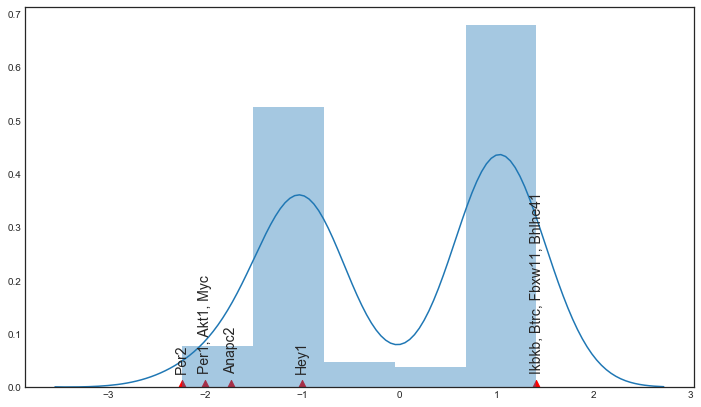

In [62]:
genes_to_rank = ['Ikbkb', 'Btrc', 'Fbxw11', 'Bhlhe41','Per2', 'Per1', 'Akt1', 'Myc', 'Anapc2']
ura.compare_genes(genes_to_rank, font_size = 14)

Per2 was predicted to be inhibiting to its downstream targets. The network below shows that Per2 has 3 DEG targets, where each of those targets is significantly up-regulated (bright red node color indicates up regulation). Per2's interaction with each of those up-regulated DEGs is inhibiting (as indicated by the blue edges between Per2 and the 3 red nodes). The following chart is represents our activation state prediction algorithm:

(interaction type/regulation direction = predicted state)
- activating/up  = activating
- activating/down = inhibiting
- **inhibiting/up = inhibiting**
- inhibiting/down = activating

According to our algorithm, Per2 should be strongly inhibiting because all of the DEGs uninanimously agree (by being up-regulated and having an inhibiting interaction with Per2) that it is.

In [73]:
ura.vis_tf_network('Per2',
              directed_edges = True,
              color_non_DEGs = False,
              node_spacing = 1100,
              graph_id = 1, # needs to be different for every graph in the notebook
              tf_size_amplifier = 5)

## Heat Propagation and Clustering Analysis
<a id='hpc'></a>

The Heat2 module provides tools to conduct an integrated network analysis of a set of differentially expressed genes (DEGs).

In [64]:
heat = Heat2.Heat(gene_type = symbol, species = mouse)

### Load Networks
<a id='loadhpc'></a>

In [66]:
filename = '../../background_networks/10090.protein.links.v10.5.txt'
heat.load_STRING_links(filename, confidence_filter = 700)

print('\nNumber of interactions: ' + str(len(list(heat.DG_universe.edges()))))

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-13911...done.
Finished.
70 input query terms found dup hits:
	[(u'ENSMUSP00000092661', 2), (u'ENSMUSP00000001415', 2), (u'ENSMUSP00000136781', 2), (u'ENSMUSP00000
410 input query terms found no hit:
	[u'ENSMUSP00000137120', u'ENSMUSP00000128098', u'ENSMUSP00000136100', u'ENSMUSP00000039192', u'ENSMU
Pass "returnall=True" to return complete lists of duplicate or missing query terms.

Number of interactions: 368701


In [67]:
# using the same DEG file as with URA
heat.create_DEG_list(DEG_filename, p_value_filter = 0.05, sep = ',')

print('Number of DEG\'s: ' + str(len(heat.DEG_list)))

Number of DEG's: 70


### Run Heat Propagation
<a id='heat'></a>

Below is a visualization of our heat propagation. Here we are displaying roughly the hottest 200 nodes, where triangle nodes are DEGs. The redder the node, the hotter it is.

In [68]:
heat.normalized_adj_matrix()

In [83]:
heat.draw_heat_prop(num_nodes = 200,
                  random_walk = True,
                  edge_width = 2,
                  edge_smooth_enabled = True,
                  edge_smooth_type = 'bezier',
                  node_size_multiplier = 5,
                  hover = False,
                  hover_connected_edges = False,
                  largest_connected_component = True,
                  physics_enabled = True,
                  node_font_size = 40,
                  graph_id = 2, # needs to be different for every graph in the notebook
                  node_shadow_x = 6)

### Clustering
<a id='cluster'></a>

Now we take those same 200 nodes displayed above, and we run a cluster analysis on them. Each cluster has been assigned a different color. If you hover your mouse over a node, you will see its assigned cluster id, or you can check out the cluster legend below our network.

In [100]:
heat.draw_clustering(rad_positions = False,
                k = None,
                largest_connected_component = True,
                num_top_genes = 200,
                cluster_size_cut_off = 0,
                remove_stray_nodes = True,
                node_spacing = 700,
                node_size_multiplier = 10,
                physics_enabled = True,
                node_font_size = 40,
                graph_id = 3, # needs to be different for every graph in the notebook
                edge_width = 2,
                edge_smooth_enabled = True,
                edge_smooth_type = 'bezier',
                hover = False,
                hover_connected_edges = False
               )

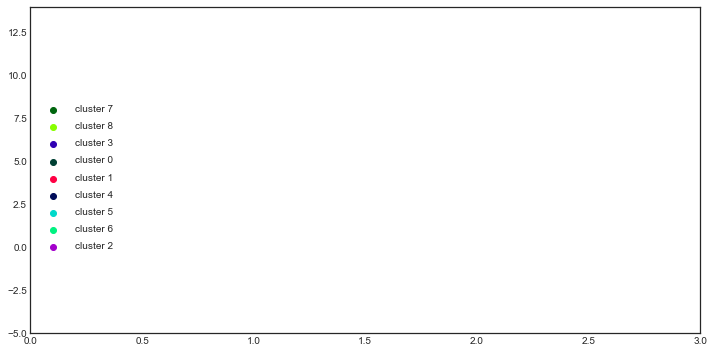

In [105]:
heat.cluster_legend()

Now we spacially separate the clusters, so you can see them better. 

In [101]:
heat.draw_clustering(rad_positions = True,
                k = None,
                r = 0.5,
                largest_connected_component = True,
                num_top_genes = 200,
                cluster_size_cut_off = 0,
                remove_stray_nodes = True,
                node_spacing = 1000,
                node_size_multiplier = 5,
                physics_enabled = False,
                node_font_size = 20,
                graph_id = 4, # needs to be different for every graph in the notebook
                edge_width = 1,
                edge_smooth_enabled = True,
                edge_smooth_type = 'bezier',
                hover = False,
                hover_connected_edges = False
               )

Lastly, rather than color by cluster, we color by log fold change. Blue nodes have negative log fold change values and red nodes have positive ones. 

In [106]:
heat.draw_clustering(rad_positions = True,
                k = None,
                r = 0.5,
                num_top_genes = 200,
                cluster_size_cut_off = 0,
                remove_stray_nodes = True,
                node_spacing = 1000,
                node_size_multiplier = 5,
                physics_enabled = False,
                node_font_size = 20,
                graph_id = 5, # needs to be different for every graph in the notebook
                edge_width = 1,
                edge_smooth_enabled = True,
                edge_smooth_type = 'bezier',
                hover = False,
                hover_connected_edges = False,
                color_lfc = True,
                largest_connected_component = True,
                vmin = -1,
                vmax = 1
               )

In [118]:
min_lfc = min(zip(*heat.get('node_to_lfc').items())[1])
max_lfc = max(zip(*heat.get('node_to_lfc').items())[1])

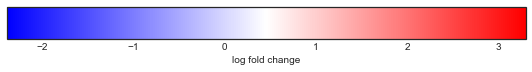

In [119]:
heat.draw_legend(label = 'log fold change')

## Gene Set Enrichment Analysis
<a id='gsea'></a>

In [121]:
gsea_prepper = PrepGsea.PrepGsea(gmt_file = '../../gseapy_databases/h.all.v6.1.symbols.gmt', 
                                 expression_file = '../../gseapy_databases/RNA_cpm_all_samples.tsv', 
                                 meta_file = '../../gseapy_databases/dHEP_metadata.csv',
                                 output_dir = '../../gsea_output')

### User Preferences for Metafile Filtering
<a id='meta'></a>

In [122]:
gsea_prepper.remove_extra_columns()

Indicate any columns that contain information you do not want to analyze.


Box(children=(Box(children=(Label(value=u'Remove unnecesary columns:'), VBox(children=(VBox(children=(Checkbox(value=False, description=u'Sample_name', style=DescriptionStyle(description_width=u'initial')), Checkbox(value=False, description=u'Sample_Name2', style=DescriptionStyle(description_width=u'initial')), Checkbox(value=False, description=u'mouse genotype', style=DescriptionStyle(description_width=u'initial')), Checkbox(value=False, description=u'short_genotype', style=DescriptionStyle(description_width=u'initial')), Checkbox(value=False, description=u'Model', style=DescriptionStyle(description_width=u'initial')), Checkbox(value=False, description=u'Treatment', style=DescriptionStyle(description_width=u'initial')), Checkbox(value=False, description=u'Tissue', style=DescriptionStyle(description_width=u'initial'))), layout=Layout(overflow=u'scroll')),))), layout=Layout(display=u'flex', flex_flow=u'row', justify_content=u'space-between')),), layout=Layout(align_items=u'stretch', border=u'solid 2px', display=u'flex', flex_flow=u'column', width=u'50%'))

### Filter Expression File
<a id='expression'></a>

### GSEA call
<a id='gseacall'></a>

### Visualization Functions
<a id='vis'></a>

In [124]:
expression_file_ensemble = '../../gseapy_databases/cpm_12_Kidney.tsv'
translate_file = '../../gseapy_databases/x2_genes_12_Kidney.tsv'

import pandas as pd
expr_ens_df = pd.read_csv(expression_file_ensemble, sep = '\t')